In [1]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, BatchNormalization
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [2]:
import pandas as pd
import urllib.request
%matplotlib inline
import matplotlib.pyplot as plt
import re
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

try:
  from konlpy.tag import Okt
except ModuleNotFoundError:
  !pip install konlpy
  from konlpy.tag import Okt

In [3]:
import tensorflow as tf

In [45]:
base_model=tf.keras.models.load_model("base_model.h5")

In [4]:
def sentence_to_input(sentence):
    new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
    new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
    encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
    pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
    return pad_new

In [5]:
data=pd.read_table("2019_news.csv", delimiter=",")
data[1720:1725]

,Date,Title,Article,Label
1720,2019-04-30 8:41,"美 경기회복, 연준 매파 전환?…FOMC 회의결과 '주목'",임종철 디자인기자 사진=임종철 디자인기자미국의 경기가 회복세로 나타나면서 다음달 1...,1.0
1721,2019-04-30 8:19,소비 지표 호조에 '사상 최고',S&P500·나스닥 지수 상승세 지속에 또 최고치 경신국제유가는 혼조세...위험자산...,1.0
1722,2019-04-30 7:54,나스닥·S&P 최고치 경신…그들만의 잔치?,전날 코스피는 4거래일 만에 상승세로 돌아섰다. 그 또한 기관과 외국인의 매수세에 ...,1.0
1723,2019-04-30 2:00,스페인 총선 결과 주목…소폭 상승,29일 유럽 주요국 증시는 스페인의 조기 총선 이후 정치적 불확실성에 주목하며 보합...,0.0
1724,2019-05-01 23:18,S&P500 사상 최고…애플 등 기술주 호조,뉴욕증권거래소© AFP=뉴스1 권영미 기자 = 1일 뉴욕증시 3대 지수가 모두 상승...,NaN


In [6]:
data[1719:1724]

,Date,Title,Article,Label
1719,2019-04-30 6:37,연내 '금리인하' 기대에 S&P 최고치 재돌파,S&P 500 지수와 나스닥종합지수가 두 거래일 연속 사상최고치를 갈아치웠다. 낮은...,1.0
1720,2019-04-30 8:41,"美 경기회복, 연준 매파 전환?…FOMC 회의결과 '주목'",임종철 디자인기자 사진=임종철 디자인기자미국의 경기가 회복세로 나타나면서 다음달 1...,1.0
1721,2019-04-30 8:19,소비 지표 호조에 '사상 최고',S&P500·나스닥 지수 상승세 지속에 또 최고치 경신국제유가는 혼조세...위험자산...,1.0
1722,2019-04-30 7:54,나스닥·S&P 최고치 경신…그들만의 잔치?,전날 코스피는 4거래일 만에 상승세로 돌아섰다. 그 또한 기관과 외국인의 매수세에 ...,1.0
1723,2019-04-30 2:00,스페인 총선 결과 주목…소폭 상승,29일 유럽 주요국 증시는 스페인의 조기 총선 이후 정치적 불확실성에 주목하며 보합...,0.0


In [7]:
# Null값 확인하기
if data['Article'].isnull().values.any():
  print(data['Article'].isnull().sum())
  print()

  # Null 값 제거하기
  data['Article'] = data['Article'].dropna(how = "any")

  # Null 값 있는지 다시 한 번 확인
  print(data['Article'].isnull().sum())

    
if data['Label'].isnull().values.any():
  print(data['Label'].isnull().sum())
  print()

  # Null 값 제거하기
  data['Label'] = data['Label'].dropna(how = "any")

  # Null 값 있는지 다시 한 번 확인
  print(data['Label'].isnull().sum())

3102

3102


In [8]:
data[1719:1724]

,Date,Title,Article,Label
1719,2019-04-30 6:37,연내 '금리인하' 기대에 S&P 최고치 재돌파,S&P 500 지수와 나스닥종합지수가 두 거래일 연속 사상최고치를 갈아치웠다. 낮은...,1.0
1720,2019-04-30 8:41,"美 경기회복, 연준 매파 전환?…FOMC 회의결과 '주목'",임종철 디자인기자 사진=임종철 디자인기자미국의 경기가 회복세로 나타나면서 다음달 1...,1.0
1721,2019-04-30 8:19,소비 지표 호조에 '사상 최고',S&P500·나스닥 지수 상승세 지속에 또 최고치 경신국제유가는 혼조세...위험자산...,1.0
1722,2019-04-30 7:54,나스닥·S&P 최고치 경신…그들만의 잔치?,전날 코스피는 4거래일 만에 상승세로 돌아섰다. 그 또한 기관과 외국인의 매수세에 ...,1.0
1723,2019-04-30 2:00,스페인 총선 결과 주목…소폭 상승,29일 유럽 주요국 증시는 스페인의 조기 총선 이후 정치적 불확실성에 주목하며 보합...,0.0


In [8]:
data[:5]

,Date,Title,Article,Label
0,2019-01-01 10:12,"""새해에도 바닥다지기 지속…랠리 촉매제 필요""",뉴욕증시가 2018년 마지막 거래일에도 오르며 크리스마스 이후 막판 상승세를 이어갔...,-1.0
1,2019-01-01 8:24,마지막 날 웃었지만···,미중 무역협상 기대에 31일 다우 1.15% 상승 마감증시 10년 강세장 마감 속 ...,-1.0
2,2019-01-01 7:39,"3대 지수, 2008년 이후 최악의 해...다우, 연간 5.6%↓",뉴욕증시가 미중간 무역협상 기대감에 올해 마지막 거래일을 상승으로 마감했다. 하지만...,-1.0
3,2019-01-01 3:23,"파리 오르고, 런던 내리고..'혼조' 마감",2018년의 마지막 날인 31일 유럽 주요 증시는 혼조세를 보이며 거래를 마쳤다.이...,-1.0
4,2019-01-02 18:00,中 지표부진에 '발목'…2010선 간신히 방어,막 오른 2019 증시…첫날부터 '내리막길' 탄 코스피中 제조업구매지수 50 밑돌아...,-1.0


In [12]:
x_train=data['Article'][:1500]

In [13]:
y_train=data['Label'][:1500]

In [14]:
y_train

0      -1.0
1      -1.0
2      -1.0
3      -1.0
4      -1.0
       ... 
1495    0.0
1496   -1.0
1497   -1.0
1498    0.0
1499    1.0
Name: Label, Length: 1500, dtype: float64

In [15]:
x_test=list(data['Article'][1500:1788])
y_test=list(data['Label'][1500:1788])

x_train=[]
y_train=[]
for idx, i in enumerate(old_y_train):
    if i!=0:
        x_train.append(old_x_train[idx])
        y_train.append(i)

print(len(x_train))
print(len(y_train))

In [16]:
y_test

[1.0,
 1.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 1.0,
 0.0,
 1.0,
 -1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 0.0,
 1.0,
 -1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 -1.0,
 -1.0,
 0.0,
 0.0,
 -1.0,
 0.0,
 -1.0,
 -1.0,
 -1.0,
 1.0,
 1.0,
 -1.0,
 -1.0,
 -1.0,
 

len(old_x_train)

x_test=[]
y_test=[]
for idx, i in enumerate(old_y_test):
    if i!=0:
        x_test.append(old_x_test[idx])
        y_test.append(i)

print(len(x_test))
print(len(y_test))

In [17]:
# 불용어 리스트
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [18]:
okt = Okt()
X_train = []
for sentence in x_train:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)
print(X_train[:3])

[['뉴욕증시', '2018년', '마지막', '거래', '일', '에도', '오르다', '크리스마스', '이후', '막판', '상승세', '이다', '가다', '.', '하지만', '3', '대다', '주요', '지수', '연간', '3~6%', '대다', '하락', '2008년', '금융위기', '이후', '최악', '연간', '상', '승률', '을', '기록', '.', '월', '전문가', '뉴욕증시', '내년', '초', '상승세', '보이다', '수', '있다', ',', '추가', '적', '인', '바닥', '다지다', '과정', '을', '필요', '로', '것', '이라고', '진단', '.', '랠리', '위', '구체', '적', '인', '촉', '매제', '필요하다', '연방', '정부', '셧다운', ',', '밉다', '중간', '무역', '협상', '등', '불확실', '성', '대한', '경계', '감', '을', '가다', '야하다', '지적', '이다', '.', '31일', '다우존스', '산업', '평균', '지수', '전일', '대비', '265.06', '포인트', '상승', '2만', '3327.46', '거래', '마치다', '.', 'S', '&', 'P', '500', '지수', '전일', '대비', '21.11', '포인트', '오른', '2506.85', '로', '장', '을', '끝내다', '.', '기술', '주', '중심', '나스닥', '종합', '지수', '6635.28', '로', '전일', '대비', '50.76', '포인트', '오르다', '.', '제프', '디', '그라프', '르네상스', '매크로', '리서치', '회장', '새해', '첫', '2~3', '주간', '을', '전망', '해보다', '시장', '궁극', '적', '약세', '장', '에서', '다음', '단계', '로', '나아가다', '전', '극단', '적', '인', '심리', '완화', '되다', ',', '낙관

In [14]:
X_test = []
for sentence in x_test:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)
print(X_test[:3])

KeyboardInterrupt: 

In [19]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
print(tokenizer.word_index)

{'.': 1, '을': 2, ',': 3, '있다': 4, '되다': 5, '것': 6, '이다': 7, '등': 8, '로': 9, '에서': 10, '적': 11, '지수': 12, '상승': 13, '시장': 14, '·': 15, '고': 16, '증권': 17, '인': 18, '투자': 19, "'": 20, '중국': 21, '미국': 22, '기': 23, '수': 24, '하락': 25, '증시': 26, '다': 27, '거래': 28, '중': 29, '전': 30, '기업': 31, '주': 32, '“': 33, '”': 34, '주가': 35, '따르다': 36, '지난해': 37, '보다': 38, '실적': 39, '돼다': 40, '성': 41, '무역': 42, '날': 43, '대비': 44, '밉다': 45, '장': 46, '하고': 47, '연구원': 48, '대한': 49, '외국인': 50, '협상': 51, '전망': 52, '마감': 53, '코스피': 54, '종목': 55, '한국': 56, '보이다': 57, '올해': 58, '기록': 59, '며': 60, '경기': 61, '순': 62, '않다': 63, '포인트': 64, '이후': 65, '까지': 66, '예상': 67, '달러': 68, '오르다': 69, '크다': 70, '말': 71, '이라고': 72, '전자': 73, '업종': 74, '‘': 75, '국내': 76, '가능성': 77, '오른': 78, '매수': 79, '일': 80, '’': 81, '발표': 82, '=': 83, '관련': 84, '기자': 85, '점': 86, '환율': 87, '이익': 88, '삼': 89, '우려': 90, '지난': 91, '주식': 92, '나오다': 93, '오다': 94, '금리': 95, '높다': 96, '투자자': 97, '대다': 98, '개': 99, '마치다': 100, '코스닥': 101, '최근': 102, '기관

In [20]:
threshold = 3
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 24414
등장 빈도가 2번 이하인 희귀 단어의 수: 14222
단어 집합에서 희귀 단어의 비율: 58.25346112886049
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 2.547576250392308


In [21]:
# 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거.
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 10194


In [22]:
X_train[:1]

[['뉴욕증시',
  '2018년',
  '마지막',
  '거래',
  '일',
  '에도',
  '오르다',
  '크리스마스',
  '이후',
  '막판',
  '상승세',
  '이다',
  '가다',
  '.',
  '하지만',
  '3',
  '대다',
  '주요',
  '지수',
  '연간',
  '3~6%',
  '대다',
  '하락',
  '2008년',
  '금융위기',
  '이후',
  '최악',
  '연간',
  '상',
  '승률',
  '을',
  '기록',
  '.',
  '월',
  '전문가',
  '뉴욕증시',
  '내년',
  '초',
  '상승세',
  '보이다',
  '수',
  '있다',
  ',',
  '추가',
  '적',
  '인',
  '바닥',
  '다지다',
  '과정',
  '을',
  '필요',
  '로',
  '것',
  '이라고',
  '진단',
  '.',
  '랠리',
  '위',
  '구체',
  '적',
  '인',
  '촉',
  '매제',
  '필요하다',
  '연방',
  '정부',
  '셧다운',
  ',',
  '밉다',
  '중간',
  '무역',
  '협상',
  '등',
  '불확실',
  '성',
  '대한',
  '경계',
  '감',
  '을',
  '가다',
  '야하다',
  '지적',
  '이다',
  '.',
  '31일',
  '다우존스',
  '산업',
  '평균',
  '지수',
  '전일',
  '대비',
  '265.06',
  '포인트',
  '상승',
  '2만',
  '3327.46',
  '거래',
  '마치다',
  '.',
  'S',
  '&',
  'P',
  '500',
  '지수',
  '전일',
  '대비',
  '21.11',
  '포인트',
  '오른',
  '2506.85',
  '로',
  '장',
  '을',
  '끝내다',
  '.',
  '기술',
  '주',
  '중심',
  '나스닥',
  '종합',
  '지수',
  '6635.28

In [23]:
#tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
#tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
#X_test = tokenizer.texts_to_sequences(X_test)
print(X_train[:3])

[[421, 704, 2011, 28, 80, 141, 69, 8376, 65, 1684, 221, 7, 117, 1, 275, 153, 98, 134, 12, 919, 10193, 98, 25, 1484, 1461, 65, 1568, 919, 127, 678, 2, 59, 1, 1359, 233, 421, 1319, 528, 221, 57, 24, 4, 3, 223, 11, 18, 731, 3521, 677, 2, 412, 9, 6, 72, 616, 1, 852, 152, 1144, 11, 18, 8377, 8378, 419, 239, 176, 454, 3, 45, 1009, 42, 51, 8, 267, 41, 49, 994, 644, 2, 117, 3296, 429, 7, 1, 1388, 474, 140, 204, 12, 158, 44, 7284, 64, 13, 293, 8379, 28, 100, 1, 356, 333, 462, 297, 12, 158, 44, 7285, 64, 78, 8380, 9, 46, 2, 1389, 1, 231, 32, 257, 337, 386, 12, 8381, 9, 158, 44, 7286, 64, 69, 1, 7287, 1744, 13829, 5942, 1794, 1260, 449, 1047, 635, 5148, 944, 2, 52, 1602, 14, 6514, 11, 287, 46, 10, 516, 1048, 9, 3813, 30, 2825, 11, 18, 166, 217, 5, 3, 693, 640, 2, 376, 667, 205, 13, 6, 2748, 16, 52, 1, 10194, 211, 735, 8382, 10195, 132, 592, 487, 14, 288, 117, 8383, 13830, 1186, 476, 42, 84, 601, 467, 14, 13, 1033, 2, 962, 60, 2220, 1047, 45, 239, 176, 454, 1220, 26, 223, 13, 2, 152, 3972, 2, 121,

In [24]:
drop_train = [index for index, sentence in enumerate(X_train) if len(sentence) < 1]
# 빈 샘플들을 제거
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)
print(len(X_train))
print(len(y_train))

1500
1500


In [25]:
y_train = np.array(y_train)
#y_test = np.array(y_test)

In [27]:
x_train[0]

'뉴욕증시가 2018년 마지막 거래일에도 오르며 크리스마스 이후 막판 상승세를 이어갔다. 하지만 3대 주요 지수는 연간 3~6%대 하락하며 2008년 금융위기 이후 최악의 연간 상승률을 기록했다. 월가 전문가들은 뉴욕증시가 내년초 상승세를 보일 수 있지만, 추가적인 바닥다지기 과정을 필요로 할 것이라고 진단했다. 랠리를 위해서는 구체적인 촉매제가 필요하며 연방정부 셧다운, 미중간 무역협상 등 불확실성들에 대한 경계감을 가져야한다는 지적이다. 31일 다우존스산업평균지수는 전일대비 265.06포인트 상승한 2만3327.46으로 거래를 마쳤다. S&P500지수는 전일대비 21.11포인트 오른 2506.85로 장을 끝냈다. 기술주 중심의 나스닥종합지수는 6635.28로 전일대비 50.76포인트 올랐다. 제프 디그라프 르네상스매크로리서치 회장은 새해 첫 2~3주간을 전망해보면 시장이 궁극적으로 이 약세장에서 다음 단계로 나아가기 전에 극단적인 심리들이 완화되고, 낙관론을 다시 회복하면서 더 상승할 것으로 믿는다 고 전망했다. 콜린 시에진스키 SIA자산관리 최고시장전략가는 윈도드레싱과 저가매수세가 무역관련 호재와 함께 시장에 상승 동력을 제공했다 며 일단 새해에 미 연방정부 셧다운이 끝나면 증시가 추가 상승을 위한 시험을 받을 것 이라고 내다봤다. 존 스톨츠퍼스 오펜하이머자산관리 최고투자전략가는 올해 증시 하락으로 2019년 상승 서프라이즈를 위한 무대가 준비되고 있다 며 주가수익비율이 지난 3분기말 수준으로 돌아가는 기회를 얻을 수 있다“고 분석했다. 하지만 그는 2019년 1분기까지 매우 중대한 랠리가 나타날 것으로는 기대하기 어렵다“며 랠리를 위한 구체적인 중요성을 가진 촉매제가 나타날 때까지 새해에도 시장 위험이 투자심리에 압박할 것 이라고 강조했다.▶안타까운 강릉 펜션 참사▶팰리세이드, 숨겨진 기능이 있다 ▶뉴스는 머니투데이 뉴욕=송정렬 특파원 songjr'

리뷰의 최대 길이 : 1401
리뷰의 평균 길이 : 467.32


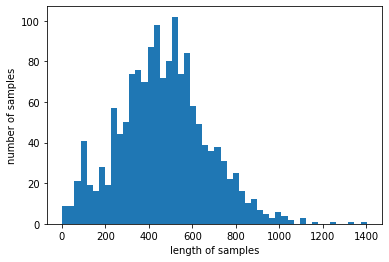

In [28]:
# 전체 데이터에서 가장 길이가 긴 리뷰와 전체 데이터의 길이 분포
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [29]:
# 전체 샘플 중 길이가 max_len 이하인 샘플의 비율이 몇 %인지 확인하는 함수
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [30]:
max_len = 1401
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 1401 이하인 샘플의 비율: 100.0


In [31]:
X_train = pad_sequences(X_train, maxlen = max_len)
#X_test = pad_sequences(X_test, maxlen = max_len)

In [44]:
base_model.trainable=False

NameError: name 'base_model' is not defined

In [46]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1941400   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,058,777
Trainable params: 2,058,777
Non-trainable params: 0
_________________________________________________________________


In [ ]:
base_model.layers

base_model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

base_model.evaluate(X_test, y_test)

In [ ]:
print(y_test[:5])

In [ ]:
base_model.predict(X_test[:5])

# 임베딩 벡터의 차원은 100으로 정했고, 리뷰 분류를 위해서 LSTM을 사용
model = Sequential()
model.add(Embedding(vocab_size, 200))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(128))
model.add(Dense(256))
model.add(Dense(128))
model.add(Dense(64))
model.add(Dense(1, activation='softmax'))

import keras.losses

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])

hist=model.fit(X_train, y_train)

In [ ]:
y_train=y_test/2

In [33]:
y_train=(y_train+1)/2
y_train

array([0. , 0. , 0. , ..., 0. , 0.5, 1. ])

In [ ]:
# 임베딩 벡터의 차원은 100으로 정했고, 리뷰 분류를 위해서 LSTM을 사용
model2 = Sequential()
model2.add(Embedding(vocab_size, 200))
model2.add(LSTM(256, return_sequences=True, activation='relu'))
model2.add(LSTM(256, return_sequences=True, activation='relu'))
model2.add(LSTM(256, return_sequences=True, activation='relu'))
model2.add(LSTM(256, return_sequences=True, activation='relu'))
model2.add(LSTM(256, activation='relu'))
model2.add(Dense(128, activation='relu'))
model2.add(Dense(64, activation='relu'))
model2.add(Dense(3, activation='softmax'))

In [ ]:
model2.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
hist2=model2.fit(X_train, y_train, epochs=5,  validation_split=0.2)

In [47]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1941400   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 2,058,777
Trainable params: 2,058,777
Non-trainable params: 0
_________________________________________________________________


In [48]:
base_model.pop()

base_model.trainable = False

In [ ]:
base_model.layers[1].

In [49]:
base_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 100)         1941400   
_________________________________________________________________
lstm (LSTM)                  (None, 128)               117248    
Total params: 4,117,425
Trainable params: 2,058,777
Non-trainable params: 2,058,648
_________________________________________________________________


In [53]:
inputs = tf.keras.Input(shape=(None,))
x=base_model(inputs, training=False)
x=tf.keras.layers.Dense(128, activation='relu')(x)
x=tf.keras.layers.Dense(64, activation='relu')(x)
x=tf.keras.layers.Dense(32, activation='relu')(x)
outputs=tf.keras.layers.Dense(1)(x)
model3=tf.keras.Model(inputs, outputs)

In [54]:
model3.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
sequential (Sequential)      (None, 128)               2058648   
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_10 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 33        
Total params: 2,085,529
Trainable params: 26,881
Non-trainable params: 2,058,648
____________________________________________

In [56]:
model3.compile(optimizer="adam",
              loss="mse",
              metrics=['accuracy'])

In [57]:
model3.fit(X_train, y_train, epochs=5)

Train on 1500 samples
Epoch 1/5
  32/1500 [..............................] - ETA: 2:19

InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument:  indices[15,1048] = 23892 is not in [0, 19414)
	 [[node model_2/sequential/embedding/embedding_lookup (defined at C:\conda\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
	 [[model_2/sequential/embedding/embedding_lookup/_10]]
  (1) Invalid argument:  indices[15,1048] = 23892 is not in [0, 19414)
	 [[node model_2/sequential/embedding/embedding_lookup (defined at C:\conda\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
0 successful operations.
0 derived errors ignored. [Op:__inference_distributed_function_12074]

Function call stack:
distributed_function -> distributed_function


In [34]:
pt_lstm2=tf.keras.models.load_model("pt_lstm2.h5")
pt_lstm3=tf.keras.models.load_model("pt_lstm3.h5")

In [35]:
pt_lstm2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 200)         3882800   
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 256)         467968    
_________________________________________________________________
lstm_13 (LSTM)               (None, 256)               525312    
_________________________________________________________________
dense_11 (Dense)             (None, 2)                 514       
Total params: 4,876,594
Trainable params: 4,876,594
Non-trainable params: 0
_________________________________________________________________


In [36]:
pt_lstm2.pop()
pt_lstm2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 200)         3882800   
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 256)         467968    
_________________________________________________________________
lstm_13 (LSTM)               (None, 256)               525312    
Total params: 4,876,594
Trainable params: 4,876,594
Non-trainable params: 0
_________________________________________________________________


In [37]:
pt_lstm2.trainable=False

In [38]:
pt_lstm2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_5 (Embedding)      (None, None, 200)         3882800   
_________________________________________________________________
lstm_12 (LSTM)               (None, None, 256)         467968    
_________________________________________________________________
lstm_13 (LSTM)               (None, 256)               525312    
Total params: 9,752,674
Trainable params: 4,876,594
Non-trainable params: 4,876,080
_________________________________________________________________


In [39]:
inputs = tf.keras.Input(shape=(None,))
x=pt_lstm2(inputs, training=False)
x=tf.keras.layers.Dense(128, activation='relu')(x)
x=tf.keras.layers.Dense(64, activation='relu')(x)
x=tf.keras.layers.Dense(32, activation='relu')(x)
outputs=tf.keras.layers.Dense(1, activation='sigmoid')(x)
model4=tf.keras.Model(inputs, outputs)
model4.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, None)]            0         
_________________________________________________________________
sequential_5 (Sequential)    (None, 256)               4876080   
_________________________________________________________________
dense (Dense)                (None, 128)               32896     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 4,919,345
Trainable params: 43,265
Non-trainable params: 4,876,080
______________________________________________

In [40]:
# 검증 데이터 손실이 4회 증가하면 학습을 조기 종료(Early Stopping)
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)

# ModelCheckpoint를 사용하여 검증 데이터의 정확도(val_acc)가 이전보다 좋아질 경우에만 모델을 저장
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [41]:
model4.compile(optimizer='adam',
              loss="mse",
              metrics=['accuracy'])

In [43]:
model4.fit(X_train, y_train, epochs=100, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Train on 1200 samples, validate on 300 samples
Epoch 1/100
  60/1200 [>.............................] - ETA: 3sWARNING:tensorflow:Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: 


InvalidArgumentError: 2 root error(s) found.
  (0) Invalid argument:  indices[57,1136] = 19635 is not in [0, 19414)
	 [[node model/sequential_5/embedding_5/embedding_lookup (defined at C:\conda\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
	 [[model/sequential_5/embedding_5/embedding_lookup/_8]]
  (1) Invalid argument:  indices[57,1136] = 19635 is not in [0, 19414)
	 [[node model/sequential_5/embedding_5/embedding_lookup (defined at C:\conda\lib\site-packages\tensorflow_core\python\framework\ops.py:1751) ]]
0 successful operations.
0 derived errors ignored. [Op:__inference_distributed_function_7732]

Function call stack:
distributed_function -> distributed_function


In [ ]:
model4.evaluate(X_test, y_test)

In [ ]:
pt_lstm2=tf.keras.models.load_model("pt_lstm2.h5")
pt_lstm3=tf.keras.models.load_model("pt_lstm3.h5")

In [ ]:
pred=pt_lstm2.predict(X_train[:15])

In [ ]:
pred

In [ ]:
x_train[14]

In [ ]:
pred2=pt_lstm3.predict(X_train[:14])

In [ ]:
pred2